<a href="https://colab.research.google.com/github/ArosevMaxim/PDA_SOL/blob/main/hw_4_visualisation_Arosev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

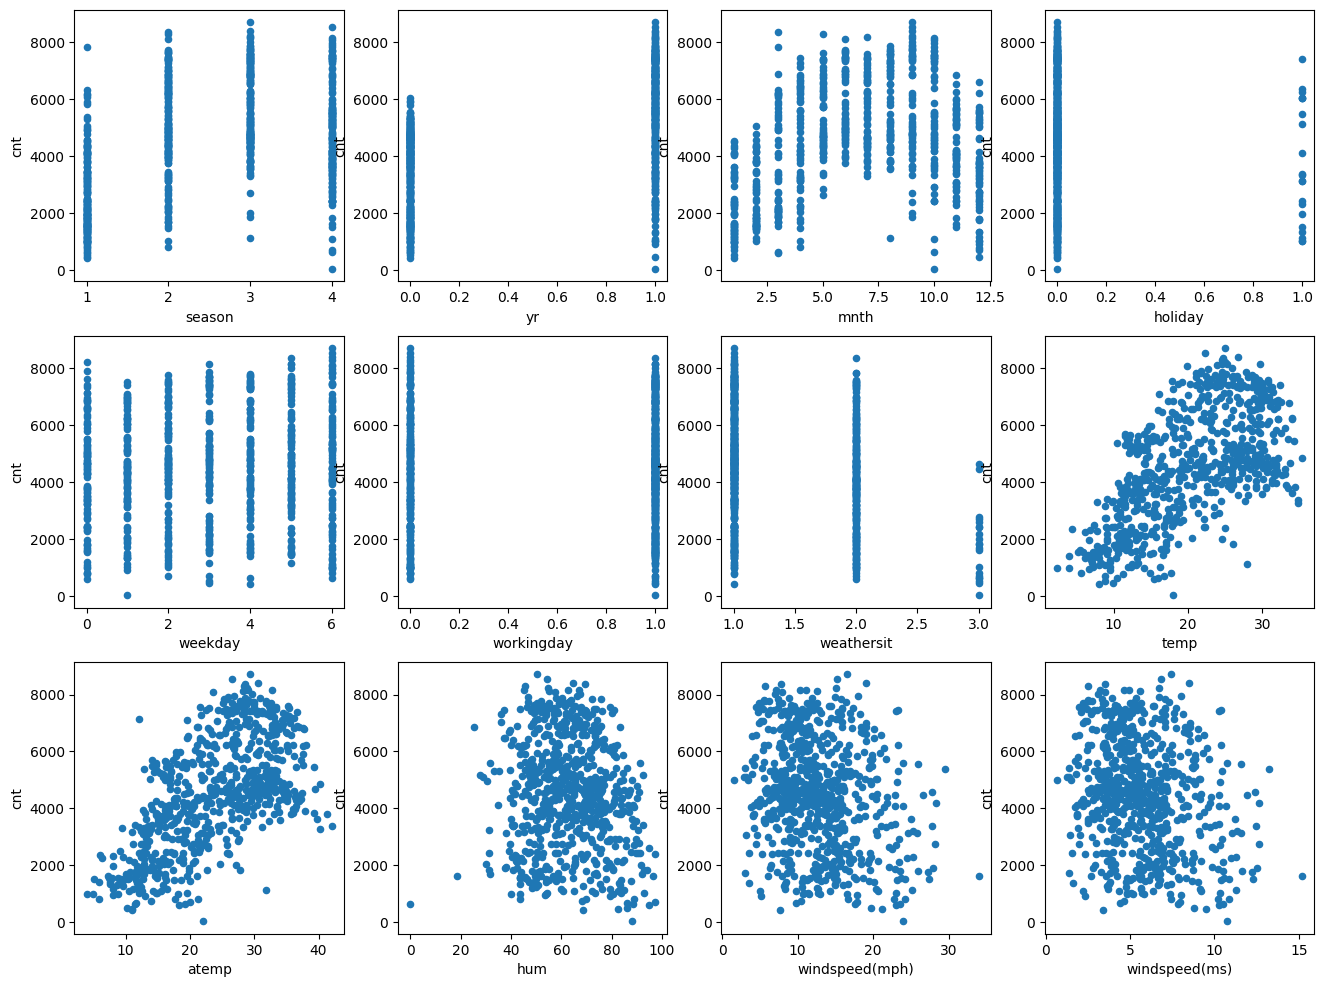

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: Эта зависимость является сезонной, к летним месяцам число прокатов растет и к зимним падает

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: Линейная зависимость скорее всего у числа прокатов и температуры, чем выше температура - тем больше людей возьмут велосипед в прокат. Так же - число прокатов и дни недели - ближе к выходным число прокатов должно расти

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ

<Axes: >

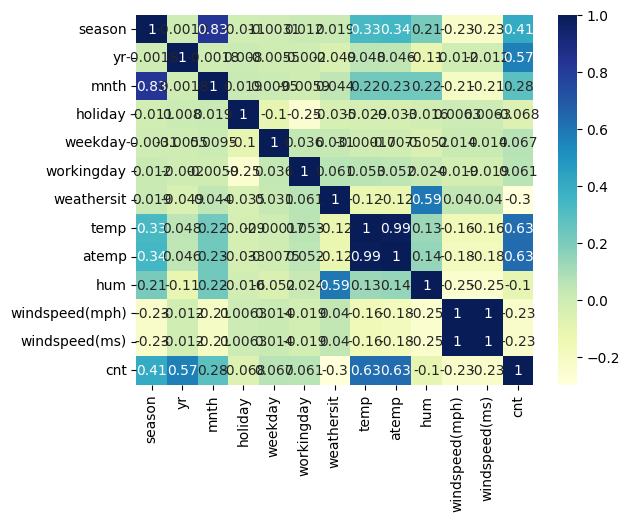

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

Ответ: больше всего с температурой, температурой по ощущениям и годом. Меньше всего - погода и скорость ветра

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ:

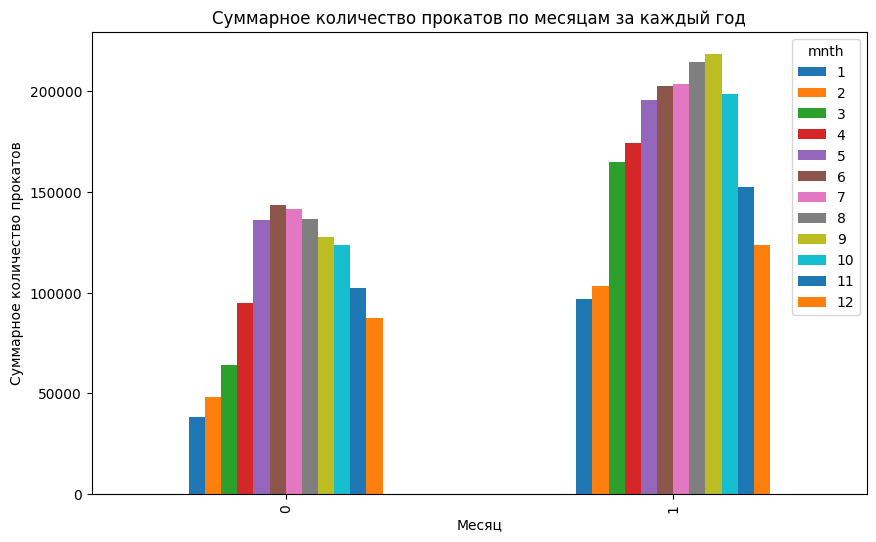

In [ ]:
grouped_data = df.groupby(['yr', 'mnth'])['cnt'].sum().unstack()

# Построение bar-графика
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Суммарное количество прокатов по месяцам за каждый год')
plt.xlabel('Месяц')
plt.ylabel('Суммарное количество прокатов')
plt.show()

Ответ: корреляция между годом и количеством прокатов была из за возросшего спроса и общего увеличившегося,

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: При формировании датасэта погода была по большей части ясная, в 0 день было больше всего ясных дней, а в 3 - больше всего самых плохих погодных условий
    
Ответ: Распределение экспоненциальное - чем выше цифра (хуже погодные условия), тем меньше таких дней в году

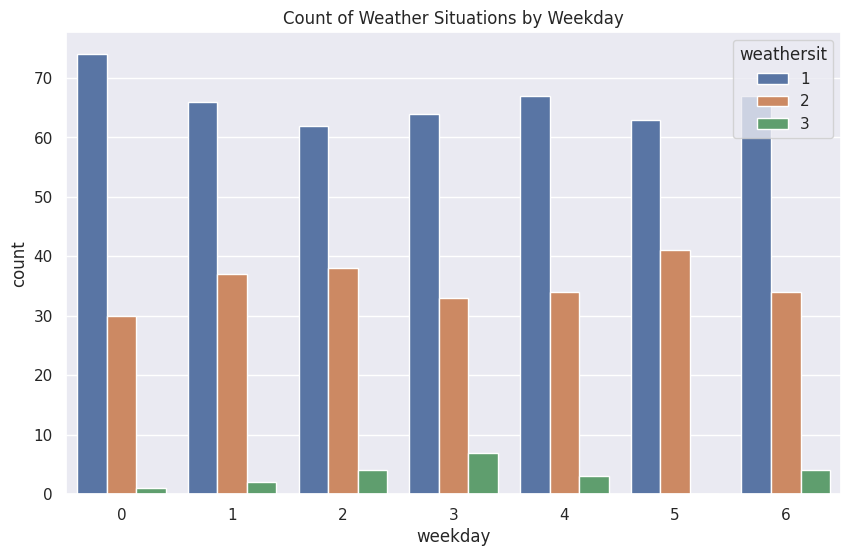

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weekday', hue='weathersit')
plt.title('Count of Weather Situations by Weekday')
plt.show()

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: по графику видно, что среденее значение - 4500 прокатов в день

Ответ: Это нормальное распределение

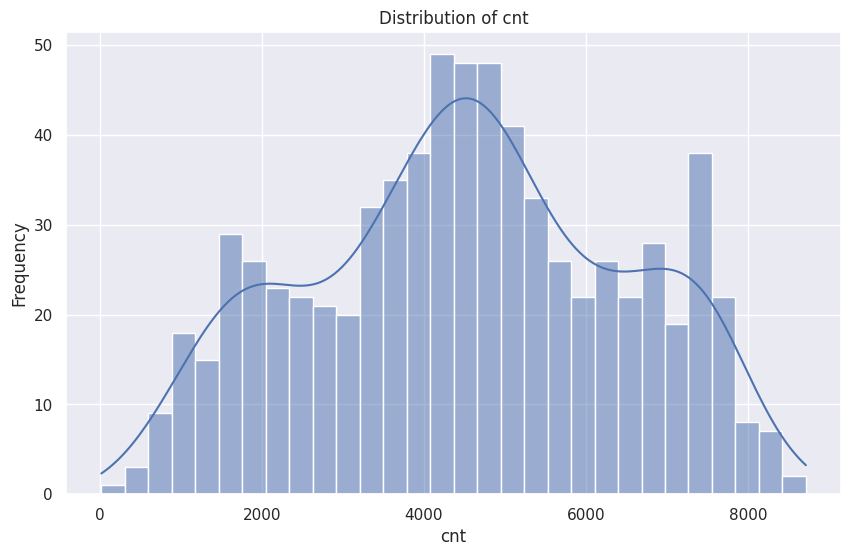

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cnt', kde=True, bins=30)
plt.title('Distribution of cnt')
plt.xlabel('cnt')
plt.ylabel('Frequency')
plt.show()

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Температура по ощущениям выше на 5 градусов, но чем ниже тем точнее и наоборот, чем выше температура тем сложнее ее определить

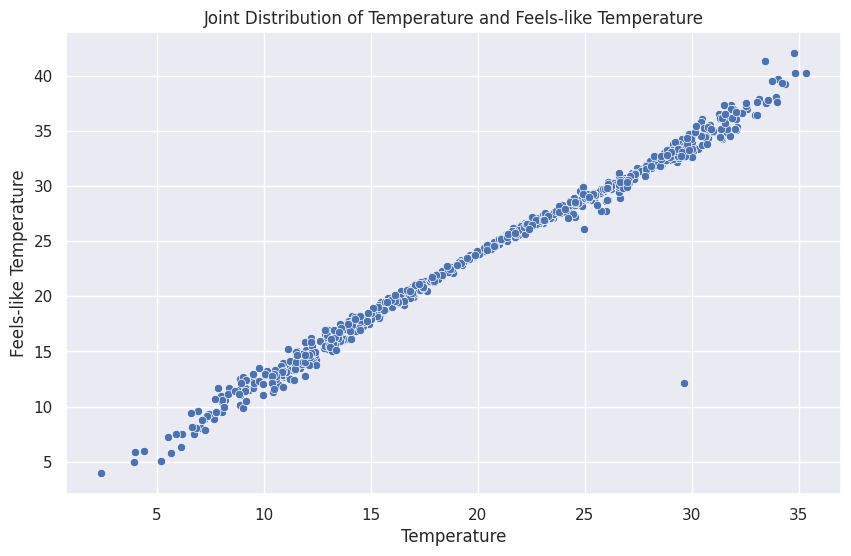

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='atemp')
plt.title('Joint Distribution of Temperature and Feels-like Temperature')
plt.xlabel('Temperature')
plt.ylabel('Feels-like Temperature')
plt.show()

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: Зимой в целом прокатов гораздо меньше, и большинство берет велосипеды только чтобы покататься в выходные, а летом, поздней весной или ранней осенью температура на улице еще/уже высокая и можно ездить на учебу или работу

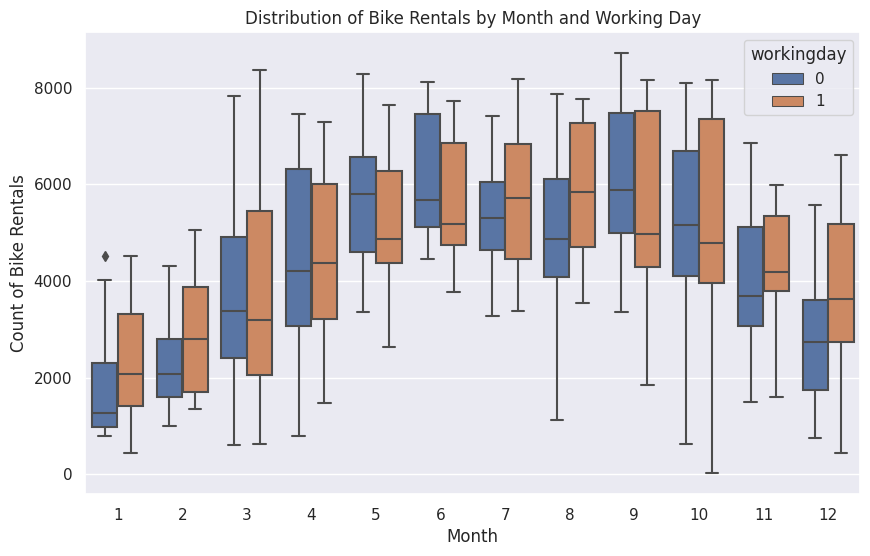

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.title('Distribution of Bike Rentals by Month and Working Day')
plt.xlabel('Month')
plt.ylabel('Count of Bike Rentals')
plt.show()

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: создадим столбец темп2 с разницей между настоящей температурой и ощущением, большинство значений располагается между -5 и 0, т.е. на самом деле температура на 5 градусов ниже. Как мы видим, чем меньше скорость ветра, тем ближе значения к -5, а при увелечении скорости ветра значения почти равномерно распределяются между -5 и 0, то есть "при слабом ветре температура ощущается на 5 градусов выше, а при сильном ветре больше дней, где температура совпадает. Это доказывает теорию

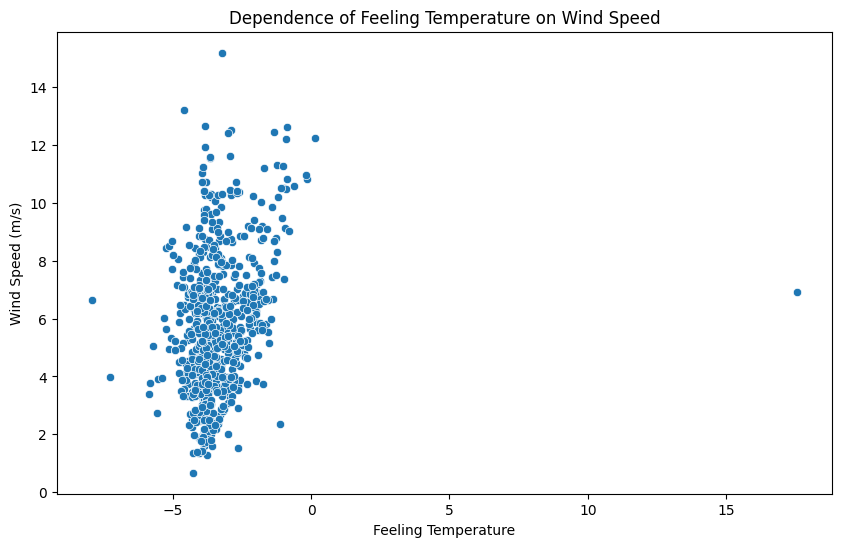

In [5]:
df['temp2'] = df['temp'] - df['atemp']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp2', y='windspeed(ms)')
plt.title('Dependence of Feeling Temperature on Wind Speed')
plt.xlabel('Feeling Temperature')
plt.ylabel('Wind Speed (m/s)')
plt.show()